# Kaggle hobby project #1
# Breast Cancer Wisconsin (Diagnostic) Data Set
### _Predict whether the cancer is benign or malignant_
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [4]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler, normalize

# some of my data analysis is inspired by the excellent notebook here: https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

In [5]:
data = pd.read_csv('../data/data.csv')

In [6]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
#remove unnecessary data
del data['Unnamed: 32']
del data['id']

In [8]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
#sns.pairplot(data, hue='diagnosis', size=1.5); # this is too big to visualize!

In [10]:
# backup the dataset as the code to run VIF for some reason removes the diagnosis column from data as well as X (I need to fix this later).
from sklearn.externals import joblib
#joblib.dump(data, 'data.pkl')

### extract features and target vector

In [11]:
# xxx_worst variables seem to correlate a lot so I might try removing these - concavity_worst is not too bad so I might leave this one in. Also, we don't need the diagnosis column in the x's
droplist = ['diagnosis','area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst']

In [12]:
x_data = data.drop(droplist, axis=1)
x_data.shape

#x_data2 = data2 # the VFI reduced dataset - use this if you want but I got lower accuracy scores compared with x_data

(569, 26)

In [13]:
#target vector
y_data = data['diagnosis']
y_data.shape

(569,)

In [14]:
#import umap
#reducer = umap.UMAP()

#embedding = reducer.fit_transform(x_data)
#embedding.shape

#y_data2 = y_data.replace(('M', 'B'), (1, 0), inplace=False) 

#plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in y_data2])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the Wisconsin cancer cell data', fontsize=24);

### Data scaling and normalisation

In [15]:
# scale and normalise the data
feature_names = x_data.columns #save the column names

x_data_scaled = scale(x_data)
x_data_scaled = pd.DataFrame(x_data_scaled)
x_data_scaled.columns = feature_names

x_data_norm = normalize(x_data)
x_data_norm = pd.DataFrame(x_data_norm)
x_data_norm.columns = feature_names

### Investage variables for correlation - move this to use scaled data!!

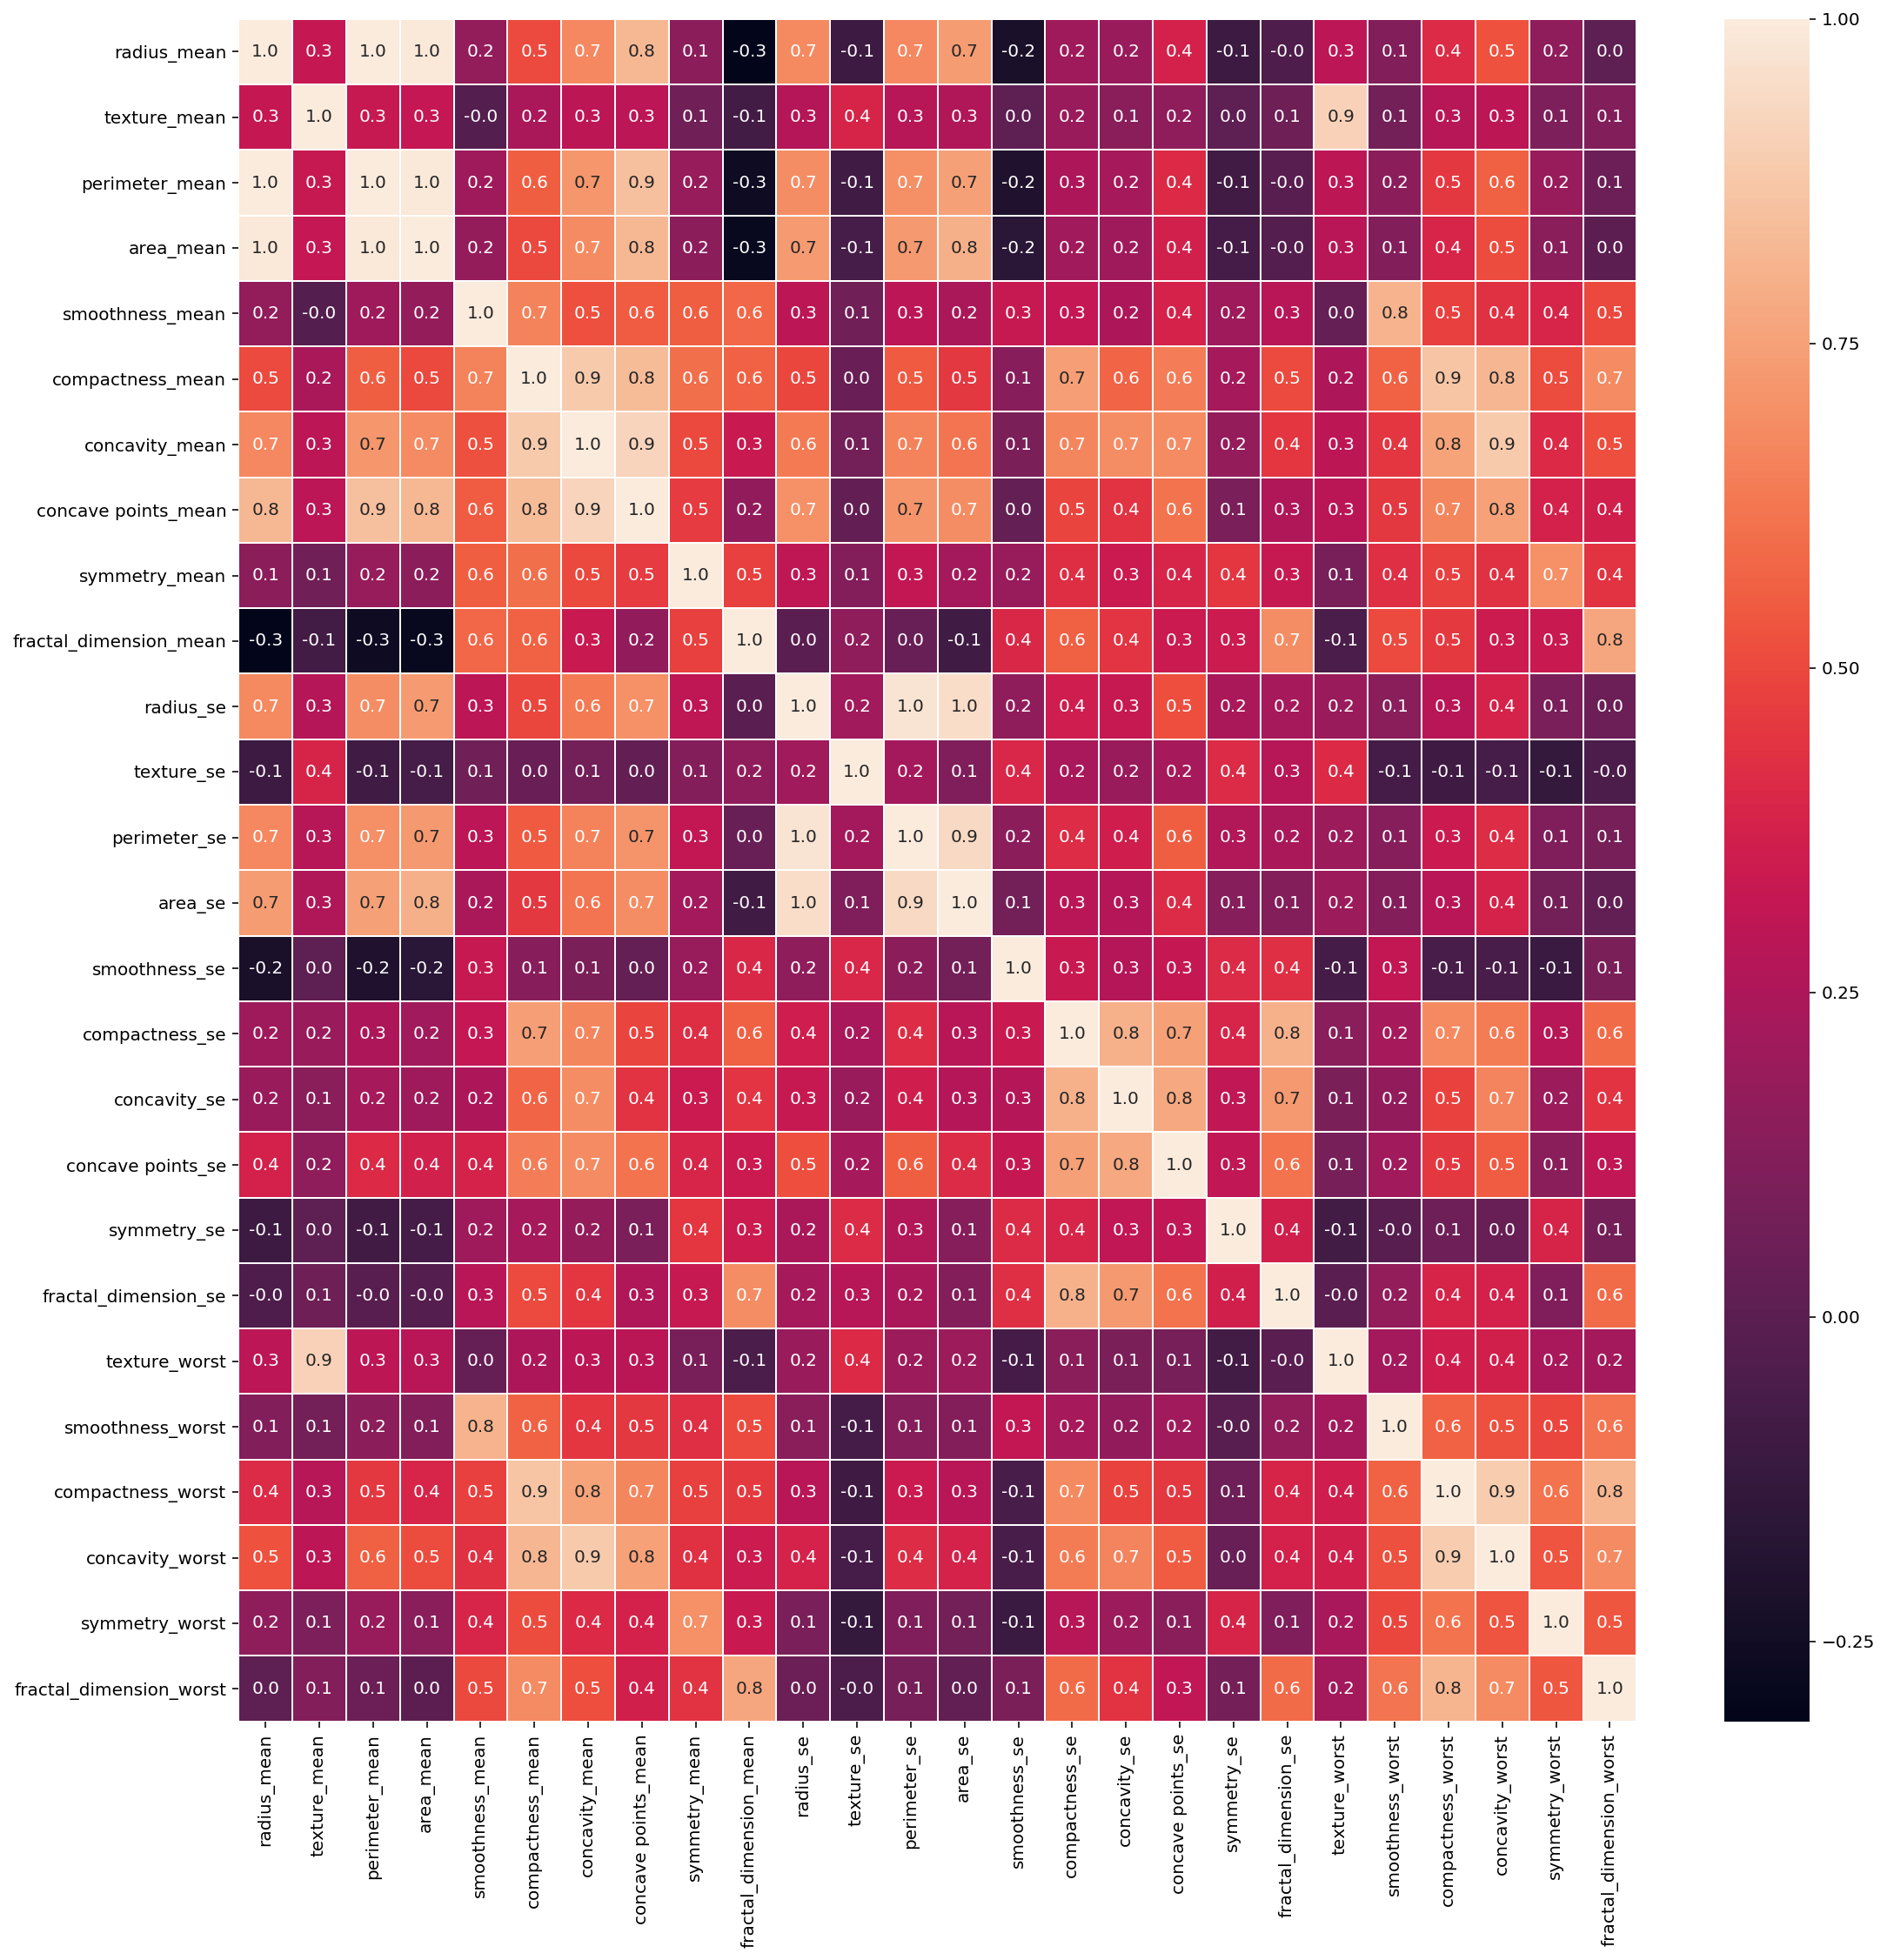

In [16]:
# heat map to look for correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_data_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from joblib import Parallel, delayed
import time

In [16]:
# dimensionality reduction function to calculate variance inflating factor and remove any features with <VIF=5
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]

In [ ]:
X = data # make a copy of the data for analysis
try:
    del X['diagnosis'] #remove target vector
except:
    X = data
    
data2 = calculate_vif_(X,5) # calculate VIF and drop features below threshold.

* **Note:** I tried applying the reduced data set and got a lower accuracy score so this notebook below sticks with the larger dataset "data" instead of using the reduced "data2" generated above.

In [18]:
# load the original data back in incase it was corrupted during the VIF calculation.
data = joblib.load('data.pkl')

#### PCA

In [18]:
from sklearn import decomposition

In [20]:
pca = decomposition.PCA(n_components=5)
pc = pca.fit_transform(x_data_scaled)

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4', 'PC5'])
pc_df['Cluster'] = y_data
pc_df.head()

PC1       PC2       PC3       PC4       PC5 Cluster
0  8.335376 -1.026069 -1.181998  3.646830 -1.149497       M
1  0.569554  3.134796 -0.575947  1.128749  0.621340       M
2  4.605010  1.660332 -0.693607  0.962903 -0.191379       M
3  8.952076 -8.603919 -2.839725  0.113786 -2.886902       M
4  2.969974  2.308947  1.201987  2.957298  0.522352       M

In [21]:
#investigate the variance
pca.explained_variance_ratio_

array([ 0.41019326,  0.17933715,  0.10353553,  0.07603316,  0.06323901])

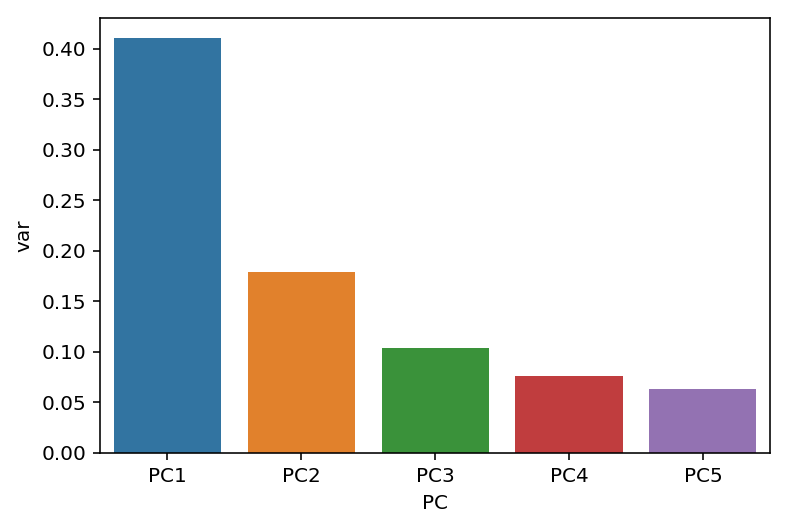

In [29]:
# plot the variance
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5']})
sns.barplot(x='PC',y="var", 
           data=df);

PC1 is responsible for most of the variance in the data.

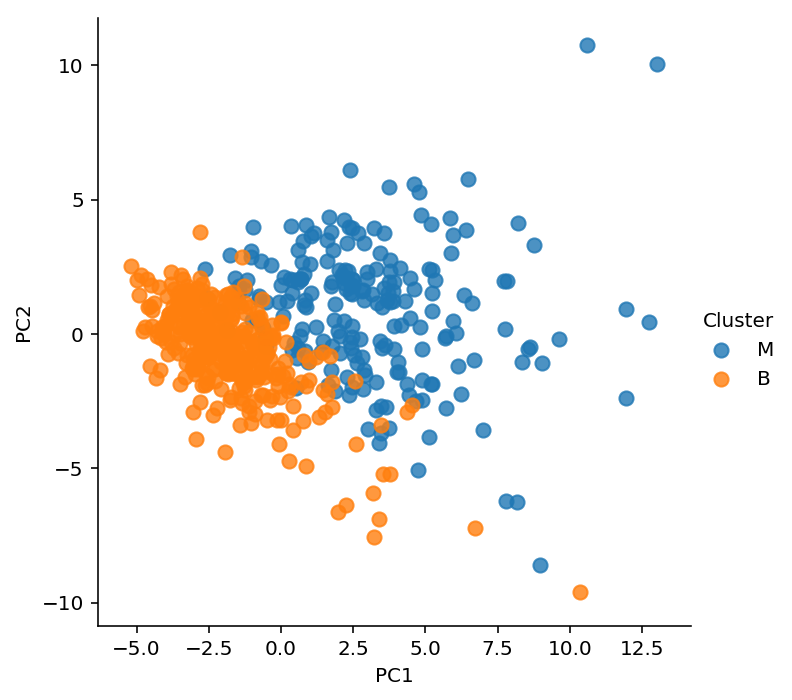

In [30]:
#plot the clusters
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 50}); # specify the point size

The data appears to be fairly discretely clustered and therefore shouldn't be a problem for the classifiers.

## Uniform Manifold Approximation and Projection for Dimension Reduction

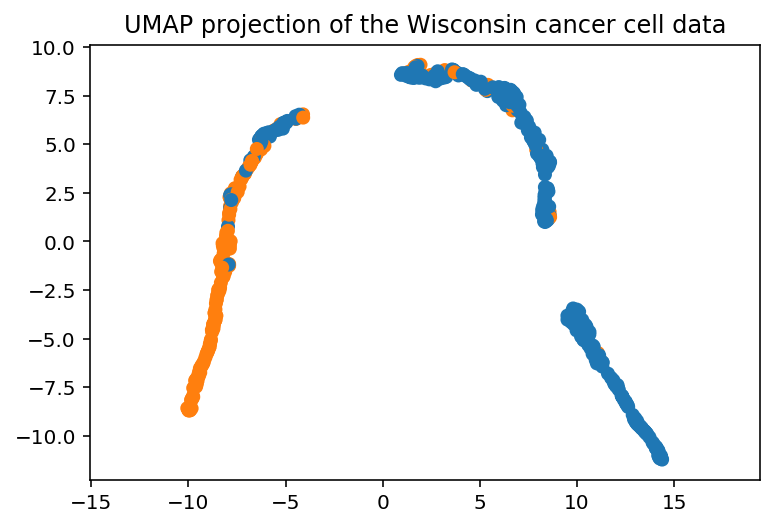

In [22]:
#https://umap-learn.readthedocs.io/en/latest/index.html

import umap
reducer = umap.UMAP()

embedding = reducer.fit_transform(x_data)
embedding.shape

y_data2 = y_data.replace(('M', 'B'), (1, 0), inplace=False) 

plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in y_data2])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Wisconsin cancer cell data', fontsize=12);

### Prep machine learning training and test data

In [19]:
### simple Gaussian naive bayes
#simple Gaussian naive Bayes
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_data_scaled, y_data, test_size=0.3, random_state=8418)

In [20]:
# confusion matrix plotting function
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
# roc plot function

from sklearn.metrics import roc_curve, auc

def plot_roc_auc(actual, preds):
    fpr, tpr, thresholds = roc_curve(actual, preds[:,1])
    plt.plot(fpr, tpr,'r')
    plt.plot([0,1],[0,1],'b')
    plt.title('AUC: {}'.format(auc(fpr,tpr)))
    plt.show()

### First pass - A simple Naive Bayes classifier

Accuracy is:  0.912280701754


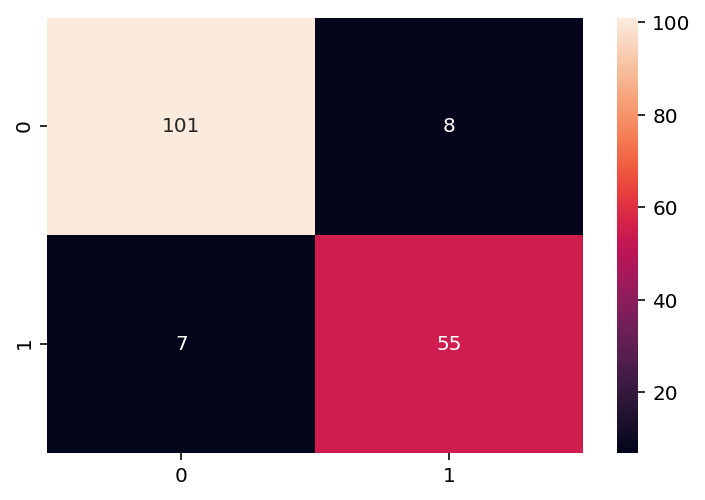

In [26]:
from sklearn.naive_bayes import GaussianNB #choose model class - done
model = GaussianNB() #instantiate the model - done (GaussianNB has no hyperparameters)
model.fit(xtrain, ytrain) #fit the model to the data
y_model = model.predict(xtest) #predict on new data
#finally, use the accuracy_score utility to see the fraction of predicted labels that match their true value:

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
ac = accuracy_score(ytest,model.predict(xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(ytest,model.predict(xtest))
sns.heatmap(cm,annot=True,fmt="d");

In [12]:
# 91 percent model accuracy with simple Gaussian naive bayes method.

### Try a support vector machine

In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=25, random_state=8418, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

#### Hyper-Parameter optimization

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
             'svc__gamma': [0.00005, 0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [28]:
grid.fit(xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [29]:
# best params: {'svc__C': 5, 'svc__gamma': 0.005}
model = grid.best_estimator_
yfit = model.predict(xtest)

Accuracy is:  0.9824561403508771


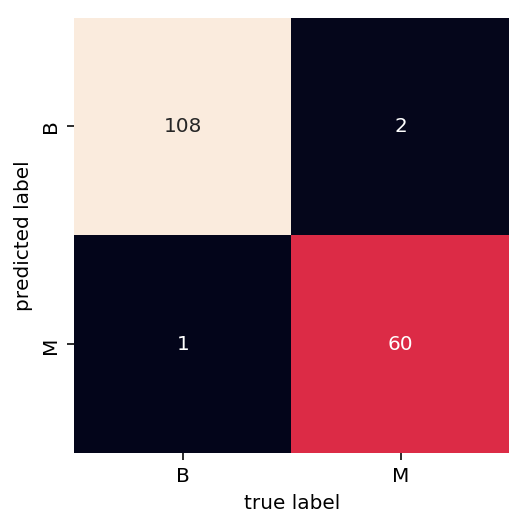

In [30]:
ac = accuracy_score(ytest,model.predict(xtest))
print('Accuracy is: ',ac)

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['B','M'],
            yticklabels=['B','M'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [31]:
ytest.str.contains(r'B').sum(), ytest.str.contains(r'M').sum(), 

(109, 62)

The support vector machine is 98% accurate. **Best so far!**

#### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf_rf = RandomForestClassifier(random_state=8418)      
clr_rf = clf_rf.fit(xtrain,ytrain)

Accuracy is:  0.9649122807017544


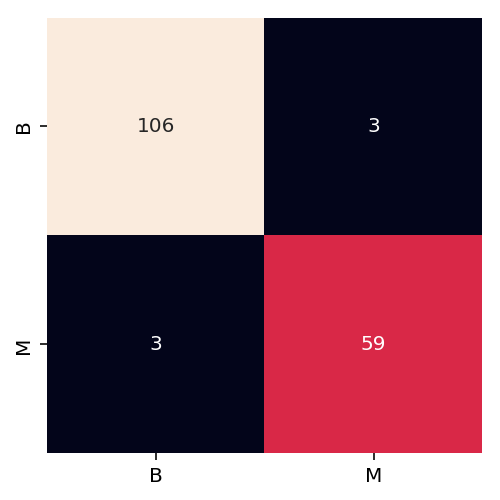

In [34]:
ac = accuracy_score(ytest,clf_rf.predict(xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(ytest,clf_rf.predict(xtest))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['B','M'],
            yticklabels=['B','M'])

96% accuracy achieved with the random forest classifier.

#### Feature selection

In [35]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(xtrain, ytrain)
print('Chosen best 5 feature by rfe:',xtrain.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['perimeter_mean', 'area_mean', 'concave points_mean', 'texture_worst',
       'concavity_worst'],
      dtype='object')


Accuracy is:  0.9649122807017544


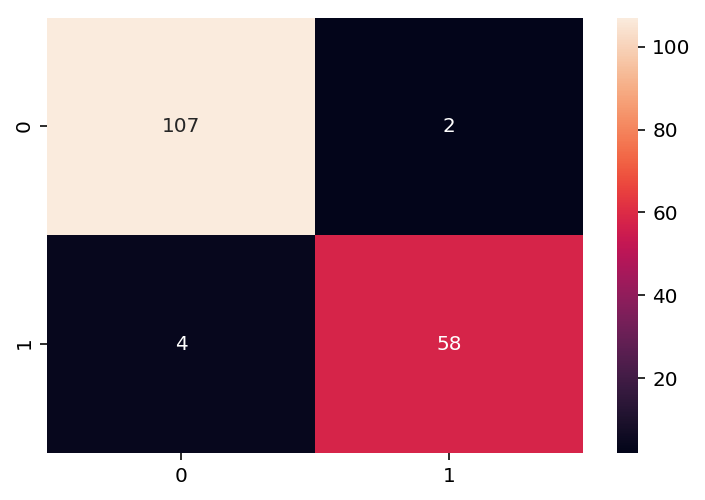

In [36]:
xtrain3 = rfe.transform(xtrain)
xtest3 = rfe.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(xtrain3,ytrain)
ac_3 = accuracy_score(ytest,clf_rf_3.predict(xtest3))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(ytest,clf_rf_3.predict(xtest3))
sns.heatmap(cm_3,annot=True,fmt="d");

bit worse than before - 95% accuracy.

### Recursive feature elimination with cross validation and random forest classification

In [36]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(xtrain, ytrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xtrain.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'area_se', 'fractal_dimension_se', 'texture_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst'],
      dtype='object')


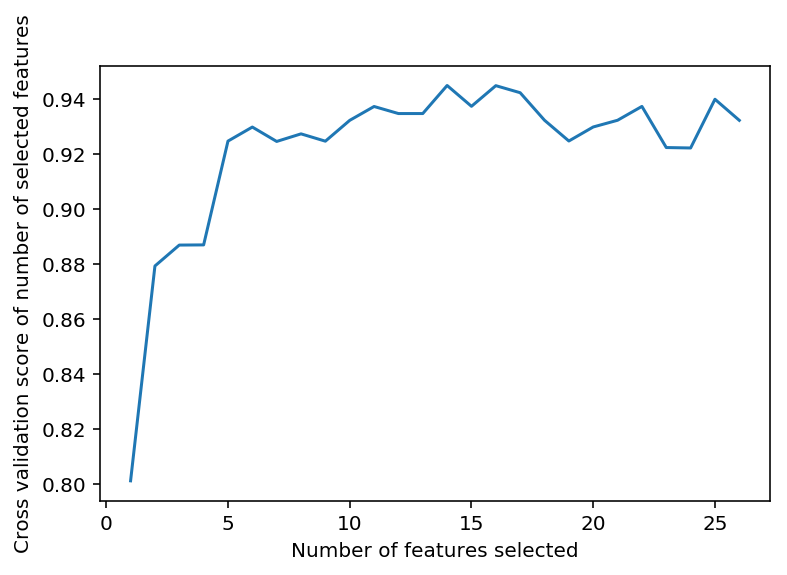

In [37]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
# levels out at about 9 features

Accuracy is:  0.9473684210526315


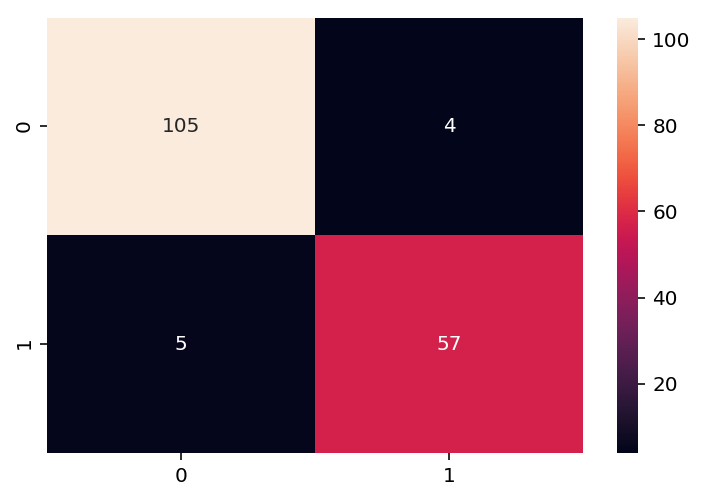

In [38]:
xtrain4 = rfecv.transform(xtrain)
xtest4 = rfecv.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_4 = RandomForestClassifier()      
clr_rf_4 = clf_rf_4.fit(xtrain4,ytrain)
ac_4 = accuracy_score(ytest,clf_rf_4.predict(xtest4))
print('Accuracy is: ',ac_4)
cm_4 = confusion_matrix(ytest,clf_rf_4.predict(xtest4))
sns.heatmap(cm_4,annot=True,fmt="d");

**bit worse again. Flogging a dead horse at this point. The SVM model above is as good as it gets for this data set at 98% accuracy.**

# _Addendum_

#### Principle component analysis (PCA)
* PCA for feature extraction 1st requires normalizing the data:

Text(0,0.5,'explained_variance_ratio_')

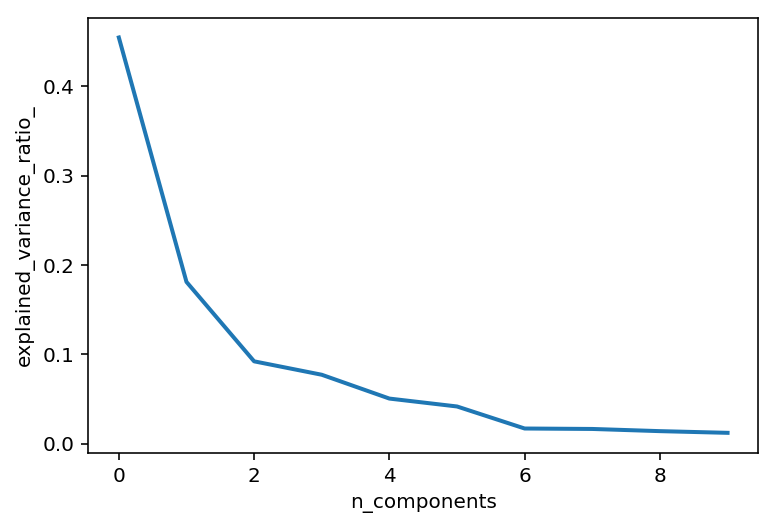

In [27]:
# split data train 70 % and test 30 %
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=42) #70/30 train/test split
#normalization
xtrain_norm = (xtrain-xtrain.mean())/(xtrain.max()-xtrain.min())
xtest_norm = (xtest-xtest.mean())/(xtest.max()-xtest.min())

from sklearn.decomposition import PCA
#pca = PCA()
pca = PCA(n_components=10) # set number of components to plot table below
pca.fit(xtrain_norm)

plt.figure()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [32]:
# According to variance ratio, 6 component can be chosen.

In [40]:
#Dump components relations with features:
#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_,columns=xtrain_norm.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC-1      0.226917      0.102605        0.241003   0.202754         0.159217   
PC-2     -0.389761     -0.090688       -0.370462  -0.342233         0.169137   
PC-3     -0.052628      0.272026       -0.049133  -0.019220        -0.077797   
PC-4      0.055726     -0.488860        0.060420   0.076616         0.080314   
PC-5     -0.031397     -0.000515       -0.026068  -0.055976        -0.456305   
PC-6      0.033429     -0.019724        0.025635  -0.007475        -0.161026   
PC-7     -0.000555      0.132589       -0.002611   0.086659        -0.121989   
PC-8      0.017309     -0.017574        0.003542  -0.029565        -0.032124   
PC-9     -0.014180      0.433946       -0.009705  -0.035944        -0.006770   
PC-10    -0.208198     -0.052501       -0.214598  -0.088278        -0.171319   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PC-1           0.320617        0.343458             0.341122       0.168053   
PC-2           0.127348       -0.030175            -0.154678       0.154252   
PC-3          -0.023167        0.024219            -0.031899       0.069910   
PC-4           0.066360        0.090417             0.100889       0.084601   
PC-5           0.025532        0.093838            -0.141213      -0.208952   
PC-6          -0.036239       -0.087170            -0.051141       0.416757   
PC-7          -0.044968       -0.166856            -0.171156      -0.480795   
PC-8          -0.167810        0.115016             0.051452      -0.229656   
PC-9           0.123200       -0.106530             0.018743       0.345279   
PC-10         -0.362567        0.148880            -0.160172       0.283368   

       fractal_dimension_mean           ...             concavity_se  \
PC-1                 0.108114           ...                 0.090656   
PC-2                 0.401887           ...                 0.062840   
PC-3                 0.035422           ...                 0.102889   
PC-4                 0.089848           ...                 0.072423   
PC-5                -0.019042           ...                 0.198928   
PC-6                -0.158809           ...                -0.073095   
PC-7                 0.055316           ...                -0.107282   
PC-8                -0.358367           ...                 0.141826   
PC-9                 0.013164           ...                 0.021982   
PC-10               -0.169253           ...                 0.199368   

       concave points_se  symmetry_se  fractal_dimension_se  texture_worst  \
PC-1            0.153348     0.062756              0.079502       0.122862   
PC-2            0.043262     0.132716              0.149618      -0.069794   
PC-3            0.188843     0.369464              0.141511       0.216905   
PC-4            0.157833     0.250558              0.108934      -0.647486   
PC-5            0.152185    -0.101582              0.188919      -0.062898   
PC-6           -0.127224     0.515861             -0.117997       0.016009   
PC-7           -0.212871     0.382779              0.008962       0.030441   
PC-8            0.179214     0.273801             -0.060642      -0.020057   
PC-9            0.302287    -0.131696              0.055671       0.053927   
PC-10           0.055397    -0.194487              0.015995       0.018845   

       smoothness_worst  compactness_worst  concavity_worst  symmetry_worst  \
PC-1           0.182433           0.271850         0.386950        0.124450   
PC-2           0.223435           0.142046         0.067141        0.107934   
PC-3          -0.252874          -0.166528        -0.189174       -0.116413   
PC-4          -0.145218          -0.159325        -0.139063       -0.087029   
PC-5          -0.506761           0.195423         0.298285       -0.116123   
PC-6          -0.208969           0.107645         0.022670        0.561702   
PC-7           0.157871           0.199829        -

## Tensorflow

In [22]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.externals import joblib #for saving the trained model

In [23]:
ytrain.replace(('M', 'B'), (1, 0), inplace=True)
ytest.replace(('M', 'B'), (1, 0), inplace=True) 

In [ ]:
# https://towardsdatascience.com/from-scikit-learn-to-tensorflow-part-1-9ee0b96d4c85

# ------------------------------------------
# TensorFlow Implementation
# ------------------------------------------


# Extract the features from the training data
feats = tf.contrib.learn.infer_real_valued_columns_from_input(xtrain)

# Building a 2-layer hidden layer DNN comprising 20 units in each layer
classifier_tf = tf.contrib.learn.DNNClassifier(
    feature_columns=feats, hidden_units=[20,20,20], n_classes=2)

# Use the train data to train this classifier
classifier_tf.fit(
    xtrain,
    ytrain,
    steps=4000,
    batch_size=100)

# Use the trained model to predict on the test data
predictions = list(classifier_tf.predict(xtest, as_iterable=True))
score = metrics.accuracy_score(ytest, predictions)

In [25]:
score

0.9766081871345029

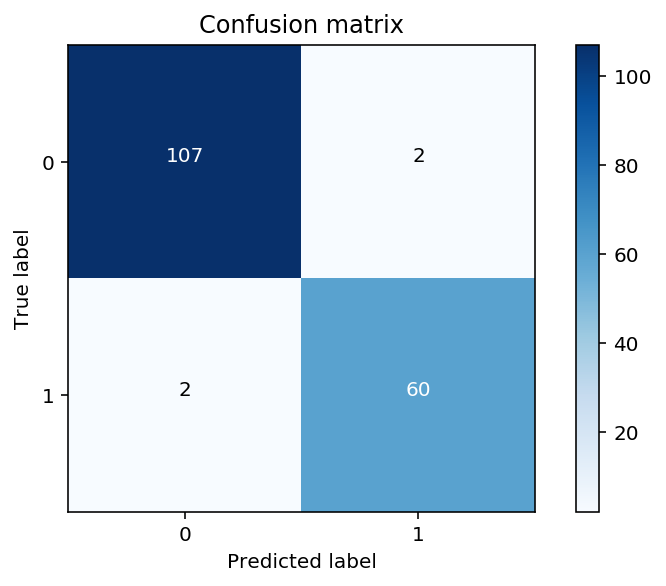

In [26]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

97% accuracy with Tensor Flow. Pretty good, but not as good as SVM.

### xgboost

In [27]:
import xgboost as xgb

In [28]:
# uncomment below if the data hasn't been vectorized already for TensorFlow:

#ytrain.replace(('M', 'B'), (1, 0), inplace=True)
#ytest.replace(('M', 'B'), (1, 0), inplace=True) 

In [29]:
reg = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=0.9,
    random_state=8418,
    eval_metric='rmse',
    early_stopping_rounds=30,
    n_jobs=4)

In [30]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [31]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


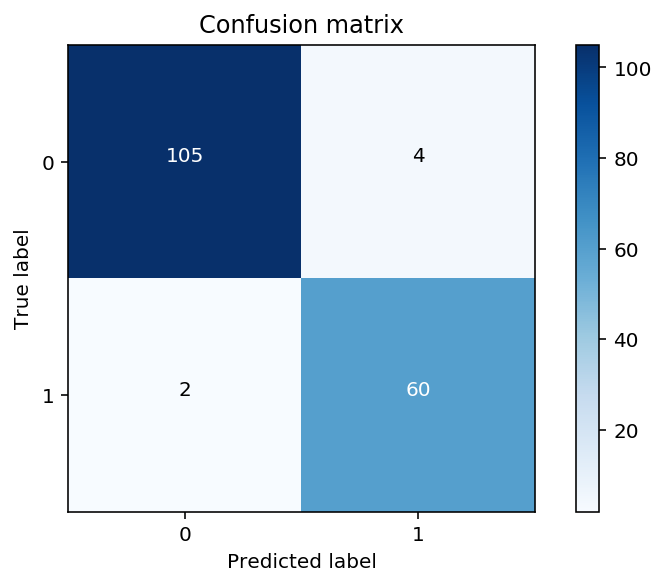

In [32]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

XGBoost provides better accuracy with unscaled data

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=8418)

ytrain.replace(('M', 'B'), (1, 0), inplace=True)
ytest.replace(('M', 'B'), (1, 0), inplace=True) 

In [34]:
reg = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=0.9,
    random_state=8418,
    eval_metric='rmse',
    early_stopping_rounds=30,
    n_jobs=4)

In [111]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [112]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


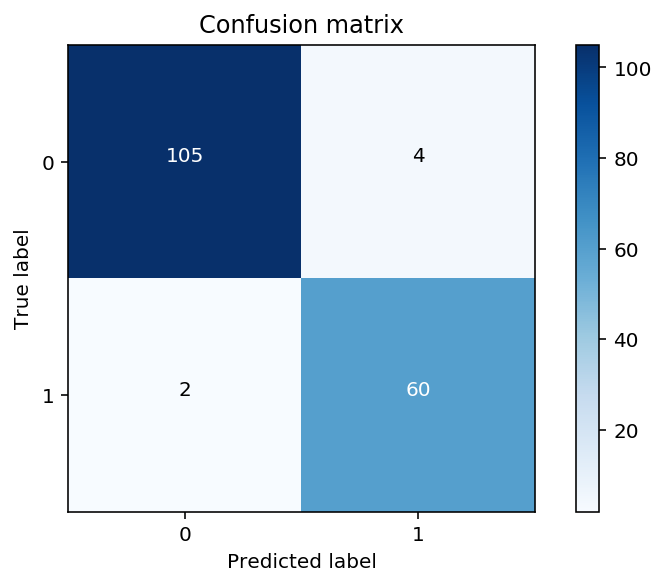

In [113]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

In [27]:
from sklearn.externals import joblib
#joblib.dump(reg, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

### Improving xgboost with parfit hyper parameter tuning

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, mean_squared_error, matthews_corrcoef
import parfit as pf

from parfit import bestFit # Necessary if you wish to use bestFit

# Necessary if you wish to run each step sequentially
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *

In [94]:
# hyper parameter tuning with parfit instead of gridsearch

# reg = xgb.XGBRegressor(n_estimators=1000, max_depth=12, learning_rate=0.1, subsample=1, colsample_bytree=0.9, random_state=8418, eval_metric='rmse',n_jobs=4)

grid = {
    'n_estimators': [100, 1000, 10000],
    'max_depth': [6,12,24], 
    'learning_rate': [0.001,0.01,0.1,1.0],  # logistic regression,
    'subsample': [0.1,0.5,0.8,1.0],
    'colsample_bytree': [0.1,0.5,0.8,1.0],
    'random_state': [8418],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

In [96]:
best_model, best_score, all_models, all_scores = pf.bestFit(
    XGBRegressor(),
    paramGrid,
    xtrain,
    ytrain,
    nfolds=10, #10-fold cross validation, can also be substituted with xval, yval datasets.
    
    metric=mean_squared_error, #roc_auc_score, 
    
    greater_is_better=False, #True
    
    scoreLabel='loss') #AUC
    
print(best_model, best_score)

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  9

Too many dimensions to plot.
{'colsample_bytree': 1.0, 'learning_rate': 1.0, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 8418, 'subsample': 1.0} 0.002768826896253971


[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 56.5min finished


In [97]:
reg = xgb.XGBRegressor(
    n_estimators=best_model['n_estimators'],
    max_depth=best_model['max_depth'],
    learning_rate=best_model['learning_rate'],
    subsample=best_model['subsample'],
    colsample_bytree=best_model['colsample_bytree'],
    random_state=8418,
    eval_metric='rmse',
    early_stopping_rounds=30,
    n_jobs=-1)

In [98]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [99]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.81%


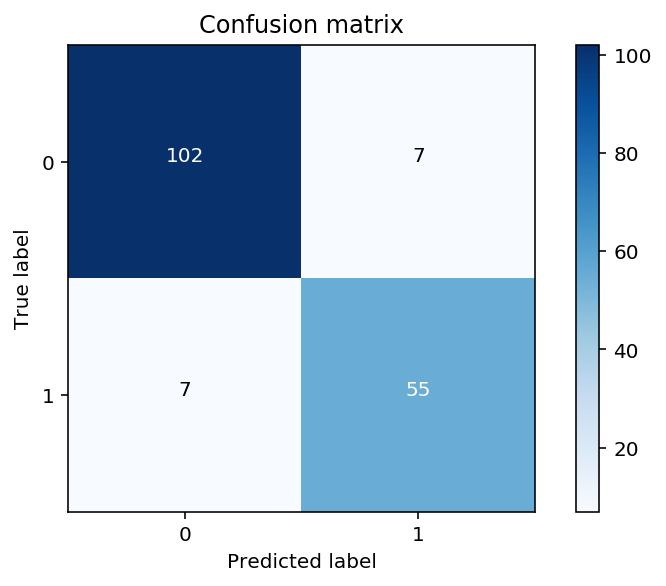

In [100]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

Previous grid search with parfit using unscaled data results:
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 10000, 'n_jobs': -1, 'random_state': 8418, 'subsample': 0.5} 0.0018576021686771281

In [53]:
best_model = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 10000, 'n_jobs': -1, 'random_state': 8418, 'subsample': 0.5}

In [54]:
reg = xgb.XGBRegressor(
    n_estimators=best_model['n_estimators'],
    max_depth=best_model['max_depth'],
    learning_rate=best_model['learning_rate'],
    subsample=best_model['subsample'],
    colsample_bytree=best_model['colsample_bytree'],
    random_state=8418,
    eval_metric='rmse',
    early_stopping_rounds=30,
    n_jobs=-1)

In [55]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [56]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


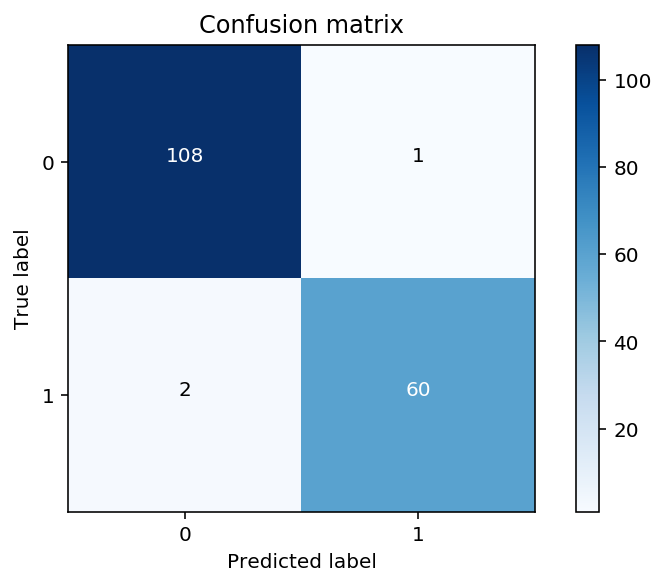

In [57]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

xgboost result is on par with SVM

In [121]:
#from sklearn.externals import joblib
#joblib.dump(reg, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

In [80]:
#reg = joblib.load('xgb_best_model.pkl')

In [88]:
# cross validation

dtrain = xgb.DMatrix(xtrain, label=ytrain)

cv = xgb.cv(
    params=best_model,
    dtrain=dtrain,
    num_boost_round=10,
    nfold=10,
    stratified=False,
    folds=None,
    metrics=(),
    obj=None,
    feval=None,
    maximize=False,
    early_stopping_rounds=None,
    fpreproc=None,
    as_pandas=True,
    verbose_eval=None,
    show_stdv=True,
    seed=8418,
    callbacks=None,
    shuffle=True)
print(cv)

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.495787        0.000141        0.496114       0.000348
1         0.491486        0.000161        0.492214       0.000654
2         0.487318        0.000195        0.488607       0.001030
3         0.483174        0.000199        0.485080       0.001546
4         0.479008        0.000256        0.481396       0.001803
5         0.474913        0.000255        0.477714       0.002168
6         0.470819        0.000254        0.474048       0.002472
7         0.466811        0.000320        0.470466       0.002622
8         0.462828        0.000378        0.467005       0.003077
9         0.458917        0.000450        0.463436       0.003432


### xgboost hyper parameter tuning with hyperopt

In [108]:
# https://www.dataiku.com/learn/guide/code/python/advanced-xgboost-tuning.html
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [89]:
best_model

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 12,
 'n_estimators': 10000,
 'n_jobs': -1,
 'random_state': 8418,
 'subsample': 0.5}

In [ ]:
def objective(space):

    clf = XGBRegressor(
        n_estimators=10000,
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'])

    eval_set = [(xtrain, ytrain), (xtest, ytest)]

    clf.fit(
        xtrain,
        ytrain,
        eval_set=eval_set,
        eval_metric="auc",
        early_stopping_rounds=30)

    pred = clf.predict(xtest)
    auc = roc_auc_score(ytest, pred)
    print("SCORE:", auc)

    return {'loss': 1 - auc, 'status': STATUS_OK}

space ={
        'n_estimators': hp.quniform('n_estimators', 100, 10000, 100),
        'max_depth': hp.uniform('max_depth', 5, 50),
        'min_child_weight': hp.uniform ('min_child', 1, 10),
        'subsample': hp.quniform ('subsample', 0.1, 1, 0.1),
        'learning_rate':hp.uniform('learning_rate',0.00001, 1),
        'colsample_bytree':hp.quniform('colsample_bytree',0.1, 1, 0.1)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

*Note*: If you receive the error message: _TypeError: 'generator' object is not subscriptable_ then check pip version of networkx. 

If it's >1.11 then pip install networkx==1.11.  
https://github.com/hyperopt/hyperopt/issues/325

In [189]:
best

{'colsample_bytree': 0.7000000000000001,
 'learning_rate': 0.14761411327395665,
 'max_depth': 44.82707124600395,
 'min_child': 9.940810546873237,
 'n_estimators': 1600.0,
 'subsample': 0.7000000000000001}

In [190]:
reg2 = XGBRegressor(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=best['colsample_bytree'],
    gamma=0,
    learning_rate=best['learning_rate'],
    max_delta_step=0,
    max_depth=int(best['max_depth']),
    min_child=best['min_child'],
    n_estimators=int(best['n_estimators']),
    n_jobs=-1,
    nthread=None,
    objective='reg:linear',
    random_state=8418,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    seed=8418,
    silent=True,
    subsample=best['subsample'])

In [191]:
reg2.fit(xtrain, ytrain)

y_pred = reg2.predict(xtest)

In [192]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.08%


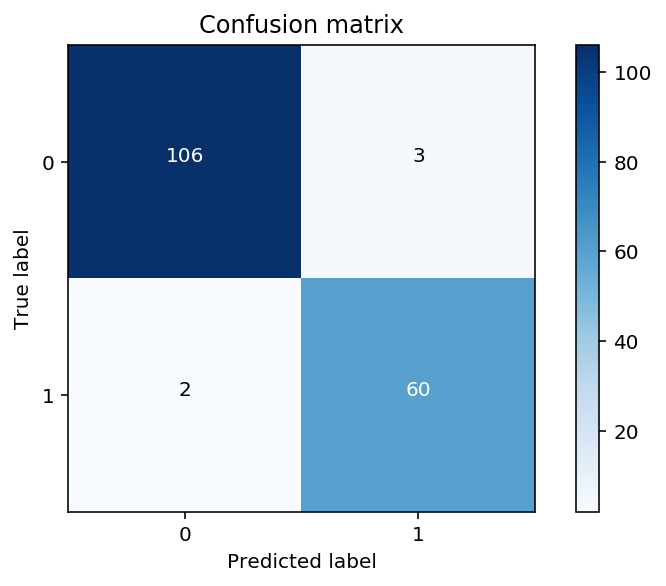

In [193]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

parfit result > hyperopt result

### CatBoost

In [22]:
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/catboost_python_tutorial.ipynb

In [46]:
from catboost import CatBoostClassifier, Pool, cv

In [47]:
model = CatBoostClassifier(
    iterations=2,
    depth=2,
    learning_rate=1,
    loss_function='Logloss',
    logging_level='Verbose')

In [48]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'], random_seed=42, logging_level='Silent')

# this function handles all the different data types in a data set so no need to process numerical, strings, etc etc which is rather nice!
categorical_features_indices = np.where(x_data.dtypes != np.float)[0]

In [49]:
model.fit(
    xtrain,
    ytrain,
    cat_features=categorical_features_indices,
    eval_set=(xtest, ytest),
    #logging_level='Verbose',  #uncomment this for text output
    plot=True)

Learning rate set to 0.070834


MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

#### Cross validation

In [50]:
# 10-fold cross validation
cv_data = cv(
    Pool(xtrain, ytrain, cat_features=categorical_features_indices),
    model.get_params(),
    plot=True)

Learning rate set to 0.011493


MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

In [51]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))


Best validation accuracy score: 0.96±0.00 on step 962


/home/ssc17-rxd10/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [52]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.9648363332573858


#### Parameter tuning

In [54]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric='Accuracy',
        random_seed=8418,
        logging_level='Silent'
    )
    
    cv_data = cv(
        Pool(xtrain, ytrain, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [55]:
params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=100,
    trials=trials
)

print(best)

{'l2_leaf_reg': 5.0, 'learning_rate': 0.11904377155591452}


In [56]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric='Accuracy',
    random_seed=42,
    logging_level='Silent'
)
cv_data = cv(Pool(xtrain, ytrain, cat_features=categorical_features_indices), model.get_params())


In [57]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.9648363332573858


### LightGBM

In [36]:
import lightgbm as lgb 
from datetime import datetime
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [37]:
train_data=lgb.Dataset(xtrain,label=ytrain)

In [38]:
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [39]:
#training our model using light gbm
num_round=300
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()

In [101]:
#Execution time of the model 
execution_time_lgbm = stop-start 
execution_time_lgbm

datetime.timedelta(0, 0, 643984)

In [102]:
#predicting on test set
ypred2=lgbm.predict(xtest)
ypred2[0:5]  # showing first 5 predictions

array([5.95026788e-01, 2.52781321e-06, 9.99999416e-01, 4.25153600e-07,
       2.45493427e-04])

In [103]:
#converting probabilities into 0 or 1
for i in range(0,len(ytest),1):
    if ypred2[i]>=.5:       # setting threshold to .5
       ypred2[i]=1
    else:  
       ypred2[i]=0

In [104]:
accuracy = accuracy_score(ytest, ypred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


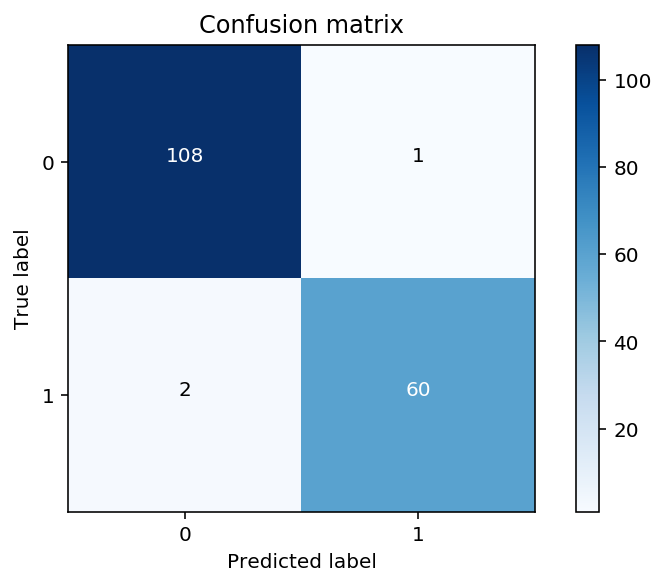

In [105]:
dat = confusion_matrix(ytest, ypred2)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

    LightGBM equals the performance of XGBoost on 1st pass and it's fast!

### Hyperopt parameter tuning for LightGBM

In [156]:
def objective(space):

    param = {
        'num_leaves': 150,
        'objective': 'binary',
        'max_depth': 7,
        'learning_rate': .05,
        'max_bin': 200
    }

    lgbm = lgb.train(param, train_data, num_round)

    eval_set = [(xtrain, ytrain), (xtest, ytest)]

    pred = lgbm.predict(xtest)
    auc = roc_auc_score(ytest, pred)

    return {'loss': 1 - auc, 'status': STATUS_OK}


space = {
    'num_leaves': hp.quniform('num_leaves', 10, 1000, 100),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.00001, 1),
    'max_bin': hp.quniform('max_bin', 1, 200, 10)
}

trials = Trials()
best = fmin(
    fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

print(best)

{'learning_rate': 0.4931797576670026, 'max_bin': 130.0, 'max_depth': 2.0, 'num_leaves': 200.0}


In [157]:
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['learning_rate'] = best['learning_rate']
param['max_bin'] = int(best['max_bin'])
param['max_depth'] = int(best['max_depth'])
param['num_leaves'] = int(best['num_leaves'])

In [158]:
#training our model using light gbm
num_round=300
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()

In [159]:
#predicting on test set
ypred2=lgbm.predict(xtest)

#converting probabilities into 0 or 1
for i in range(0,len(ytest),1):
    if ypred2[i]>=.5:       # setting threshold to .5
       ypred2[i]=1
    else:  
       ypred2[i]=0

In [160]:
accuracy = accuracy_score(ytest, ypred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


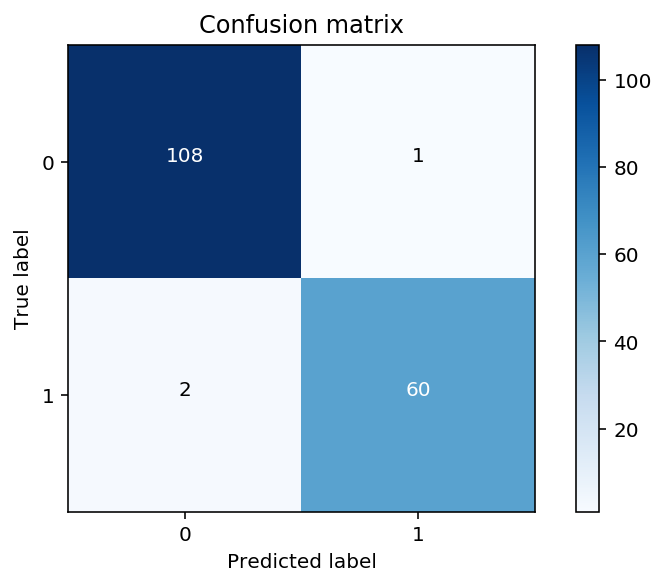

In [161]:
dat = confusion_matrix(ytest, ypred2)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

no improvement with hyperopt parameter search

### Keras

In [40]:
# uncomment below if the data hasn't been vectorized already for TensorFlow:

#ytrain.replace(('M', 'B'), (1, 0), inplace=True)
#ytest.replace(('M', 'B'), (1, 0), inplace=True) 

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


In [41]:
xtrain.shape

(398, 26)

In [42]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=26, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    return model

In [43]:
seed = 8418
# create model
model = KerasClassifier(build_fn=create_model, epochs=300, batch_size=10, verbose=0)

model.fit(xtrain, ytrain)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, xtrain, ytrain, cv=kfold)

print('mean epoch accuracy:',results.mean(), '| standard deviation:',results.std()) #average score of epochs

mean epoch accuracy: 0.7889102577972107 | standard deviation: 0.19983618687791196


Accuracy: 63.74%


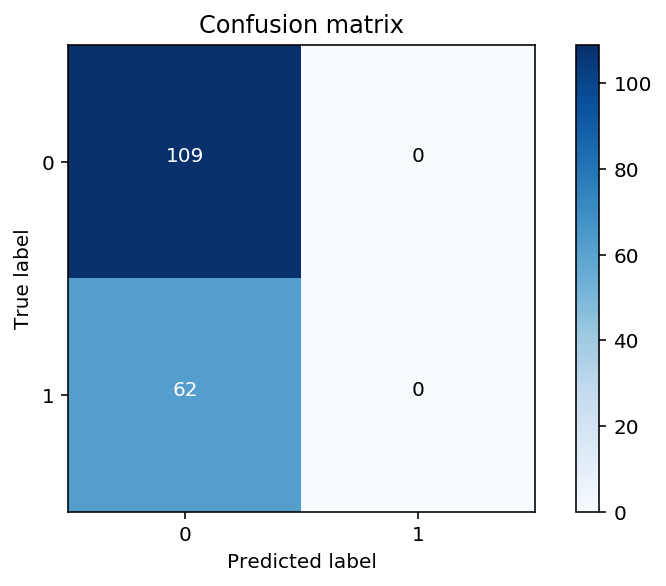

In [44]:
# Predicting the Test set results
y_pred = model.predict(xtest)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Confusion Matrix
dat = confusion_matrix(ytest, y_pred)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

### Conclusion

LightGBM provides the best model, with 98% accuracy.